# Mini Project 2



###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

In [4]:
tickers = ['AAPL', 'MSFT','AMZN', 'META']

In [5]:
start_date = dt.datetime.today()-dt.timedelta(days = 365)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date)

C:\Users\62782\AppData\Local\Temp\ipykernel_24608\3104739845.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  4 of 4 completed


In [6]:
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

In [7]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

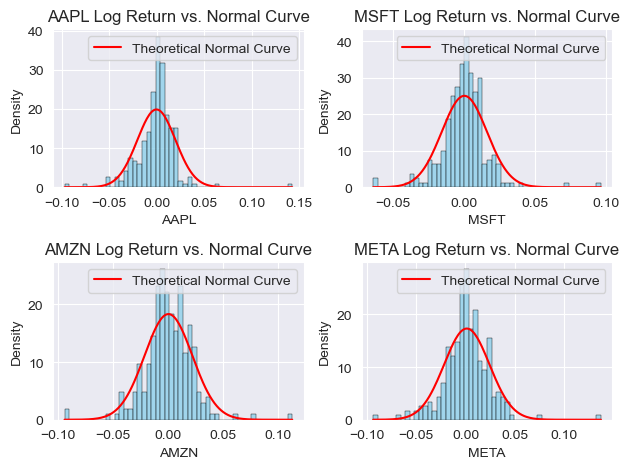

In [8]:
for i, ticker in enumerate(tickers, 1):
    returns = daily_returns[ticker].dropna()
    mu = returns.mean()
    sigma = returns.std()
    plt.subplot(2, 2, i)
    sns.histplot(returns, bins=50, stat='density', color='skyblue', edgecolor='black')
    x = np.linspace(returns.min(), returns.max(), 200)
    pdf = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mu)/sigma)**2)
    plt.plot(x, pdf, color='red', label='Theoretical Normal Curve')
    plt.title(f"{ticker} Log Return vs. Normal Curve")
    plt.legend()
    
plt.tight_layout()
plt.show()

In [9]:
for ticker in tickers:
    returns = daily_returns[ticker].dropna()
    skewness = returns.skew()
    kurtosis = returns.kurt()
    print(f"{ticker}: Skewness={skewness:.4f}, kurtosis={kurtosis:.4f}")

AAPL: Skewness=0.5714, kurtosis=12.3992
MSFT: Skewness=0.5814, kurtosis=7.9731
AMZN: Skewness=0.0104, kurtosis=4.9612
META: Skewness=0.3562, kurtosis=5.7675


In [10]:
threshold = 0.01  
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

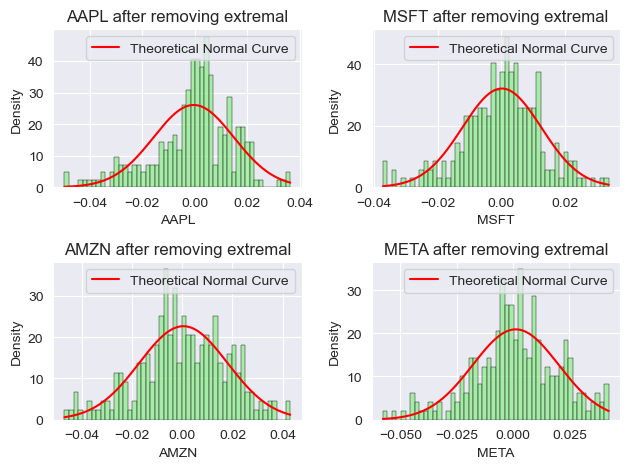

In [11]:
for i, ticker in enumerate(tickers, 1):
    returns = daily_returns[ticker].dropna()
    mu = returns.mean()
    sigma = returns.std()
    lower, upper = returns.quantile([threshold, 1-threshold])
    returns_filtered = returns[(returns >= lower) & (returns <= upper)]
    plt.subplot(2, 2, i)
    sns.histplot(
        returns_filtered, bins=50, stat='density',
        color='lightgreen', edgecolor='black'
    )
    x = np.linspace(returns_filtered.min(), returns_filtered.max(), 200)
    pdf = (1/(returns_filtered.std()*np.sqrt(2*np.pi))) * np.exp(
        -0.5 * ((x-returns_filtered.mean())/returns_filtered.std())**2
    )
    plt.plot(x, pdf, color='red', label='Theoretical Normal Curve')
    plt.title(f"{ticker} after removing extremal")
    plt.legend()

plt.tight_layout()
plt.show()

In [12]:
for ticker in tickers:
    returns = daily_returns[ticker].dropna()
    lower, upper = returns.quantile([threshold, 1-threshold])
    returns_filtered = returns[(returns >= lower) & (returns <= upper)]
    skewness = returns_filtered.skew()
    kurtosis = returns_filtered.kurt()
    print(f"{ticker}: after removing extremal Skewness={skewness:.4f}, Kurtosis={kurtosis:.4f}")

AAPL: after removing extremal Skewness=-0.6897, Kurtosis=0.7596
MSFT: after removing extremal Skewness=-0.3732, Kurtosis=0.7003
AMZN: after removing extremal Skewness=-0.2121, Kurtosis=-0.1146
META: after removing extremal Skewness=-0.2996, Kurtosis=0.2658


In [25]:
selected_stocks = []
for ticker in tickers:
    returns = daily_returns[ticker].dropna()
    skewness = returns.skew()
    kurtosis = returns.kurt()
    print(f"{ticker}: skew={skewness:.4f}, kurt={kurtosis:.4f}")
    if abs(skewness) < 1.0 and 2 < kurtosis < 6:
        selected_stocks.append(ticker)

print("Selected stocks:", selected_stocks)

AAPL: skew=0.5714, kurt=12.3992
MSFT: skew=0.5814, kurt=7.9731
AMZN: skew=0.0104, kurt=4.9612
META: skew=0.3562, kurt=5.7675
Selected stocks: ['AMZN', 'META']


Logarithmic return of the portfolio Mean=0.0009, Standard Deviation=0.0209


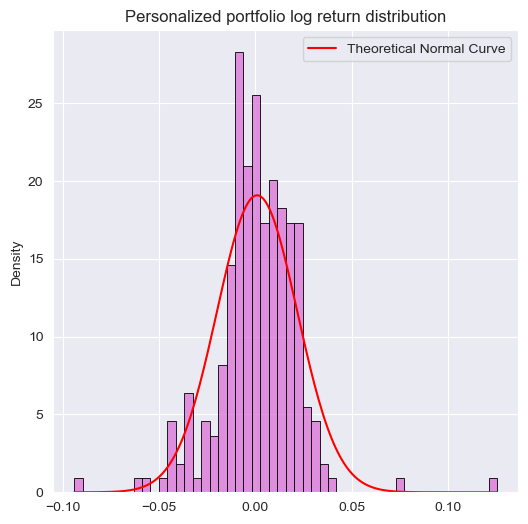

In [27]:
if len(selected_stocks) > 0:
    portfolio_returns = daily_returns[selected_stocks].mean(axis=1)
    mu_portfolio = portfolio_returns.mean()
    sigma_portfolio = portfolio_returns.std()

    print(f"Logarithmic return of the portfolio Mean={mu_portfolio:.4f}, Standard Deviation={sigma_portfolio:.4f}")
    plt.figure(figsize=(6, 6))
    sns.histplot(
        portfolio_returns, bins=50, stat='density',
        color='orchid', edgecolor='black'
    )
    x = np.linspace(portfolio_returns.min(), portfolio_returns.max(), 200)
    pdf = (1/(sigma_portfolio*np.sqrt(2*np.pi))) * np.exp(
        -0.5*((x-mu_portfolio)/sigma_portfolio)**2
    )
    plt.plot(x, pdf, color='red', label='Theoretical Normal Curve')
    plt.title("Personalized portfolio log return distribution")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No stocks matching the criteria were found")

In [29]:
portfolio_returns_df = pd.DataFrame({'log_return': portfolio_returns})
portfolio_returns_df['year'] = portfolio_returns_df.index.year


 Skewness and Kurtosis of Annual Portfolio Log Return：
2024 year：Skewness=-0.789, Kurtosis=0.984


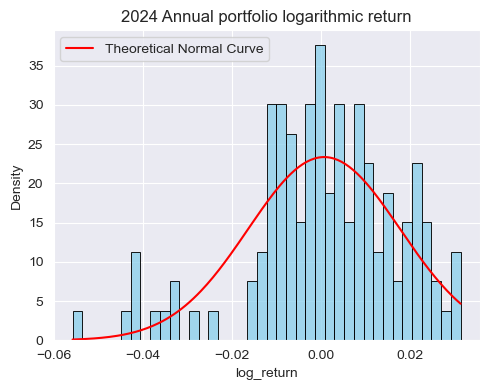

2025 year：Skewness=0.600, Kurtosis=6.900


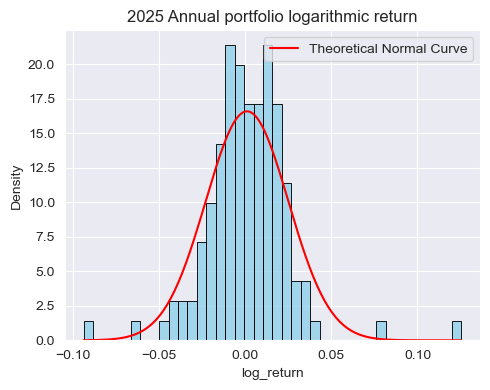

In [31]:
print("\n Skewness and Kurtosis of Annual Portfolio Log Return：")
for year in portfolio_returns_df['year'].unique():
    year_data = portfolio_returns_df[portfolio_returns_df['year'] == year]['log_return']
    if len(year_data) < 30: 
        continue
    skewness = year_data.skew()
    kurtosis = year_data.kurt()
    print(f"{year} year：Skewness={skewness:.3f}, Kurtosis={kurtosis:.3f}")

    plt.figure(figsize=(5, 4))
    sns.histplot(year_data, bins=40, stat='density', color='skyblue', edgecolor='black')
    x = np.linspace(year_data.min(), year_data.max(), 200)
    mu, sigma = year_data.mean(), year_data.std()
    pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
    plt.plot(x, pdf, color='red', label='Theoretical Normal Curve')
    plt.title(f"{year} Annual portfolio logarithmic return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


 Skewth and Kurtosis of Log Returns
AAPL: Skewness=0.571, Kurtosis=12.399
MSFT: Skewness=0.581, Kurtosis=7.973
AMZN: Skewness=0.010, Kurtosis=4.961
META: Skewness=0.356, Kurtosis=5.767

 Stocks that meet the normal distribution characteristics:
✅ AMZN
✅ META


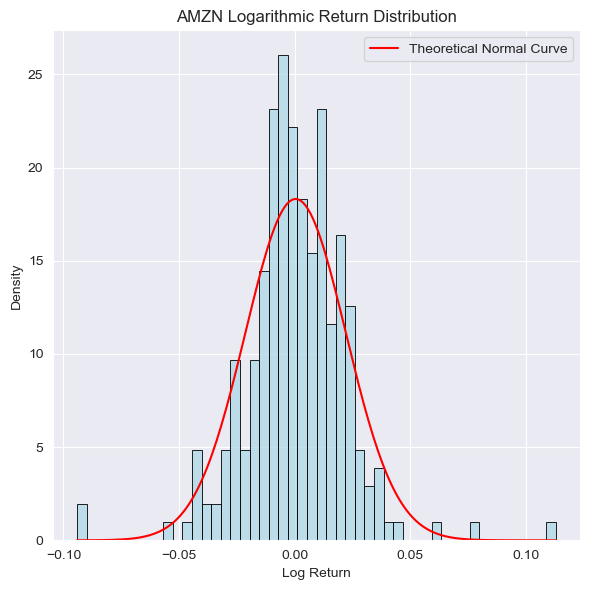

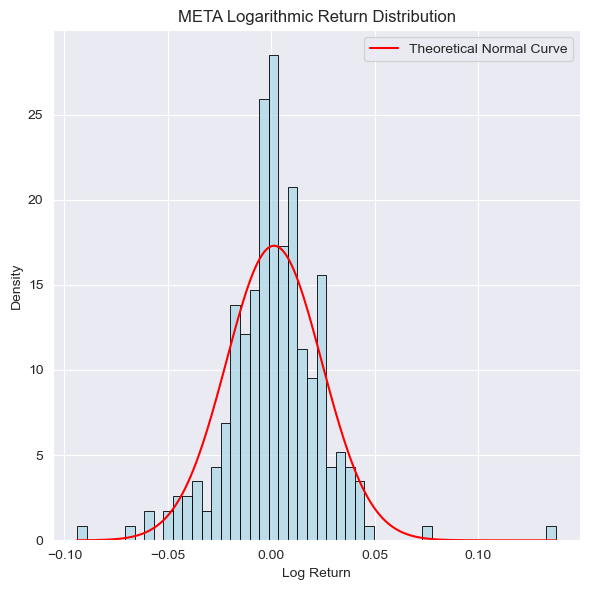

In [37]:
log_returns = daily_returns[tickers].dropna()

normal_like_stocks = []

print("\n Skewth and Kurtosis of Log Returns")
for ticker in tickers:
    returns = log_returns[ticker].dropna()
    skewness = returns.skew()
    kurtosis = returns.kurt()
    print(f"{ticker}: Skewness={skewness:.3f}, Kurtosis={kurtosis:.3f}")

    if abs(skewness) < 1.0 and 2 < kurtosis < 6:
        normal_like_stocks.append(ticker)


print("\n Stocks that meet the normal distribution characteristics:")
if normal_like_stocks:
    for s in normal_like_stocks:
        print(f"✅ {s}")
else:
    print("No stock fully meets the criteria")

for sample in normal_like_stocks:
    returns = log_returns[sample].dropna()
    mu = returns.mean()
    sigma = returns.std()

    plt.figure(figsize=(6, 6))
    sns.histplot(returns, bins=50, stat='density', color='lightblue', edgecolor='black')

    x = np.linspace(returns.min(), returns.max(), 200)
    pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    plt.plot(x, pdf, color='red', label='Theoretical Normal Curve')

    plt.title(f"{sample} Logarithmic Return Distribution")
    plt.xlabel("Log Return")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

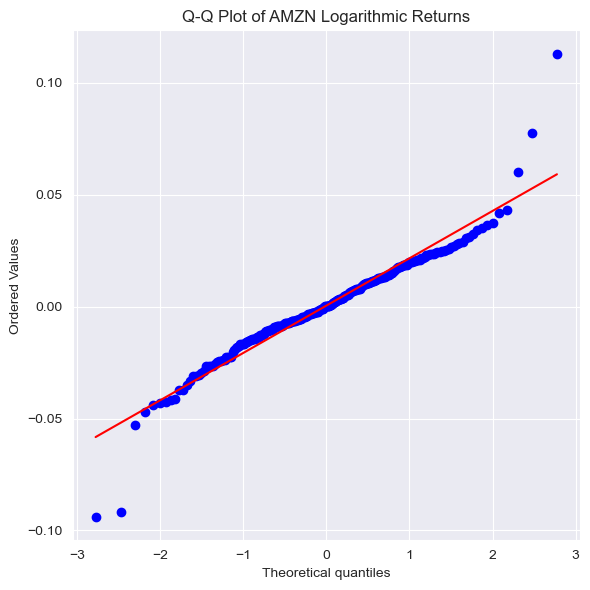

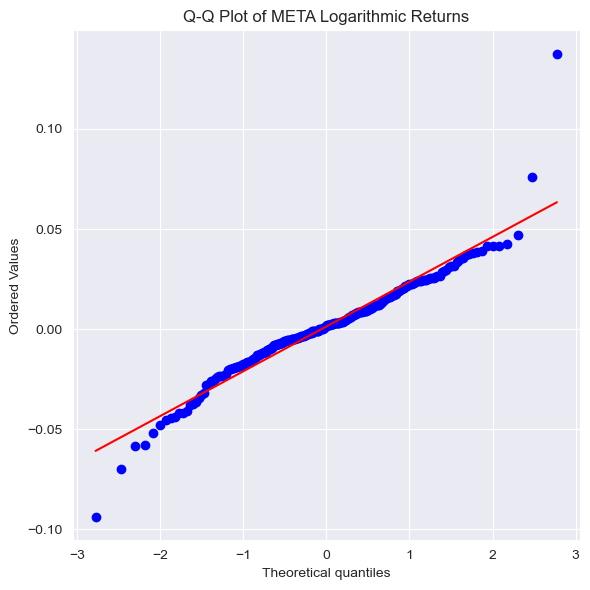

In [39]:
from scipy import stats

for sample in normal_like_stocks:
    returns = log_returns[sample].dropna()

    # Q-Q 图
    plt.figure(figsize=(6, 6))
    stats.probplot(returns, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {sample} Logarithmic Returns")
    plt.grid(True)
    plt.tight_layout()
    plt.show()